# Python

[Centrale Lille, G3 SDIA | M1 DS, University of Lille]

---

## Lab 2 - some practice with Numpy, Scipy, Pandas, h5py and Matplotlib

---

## Guidelines (read carefully before starting)


**Objectives**: acquire some practice with libraries commonly used in data science (`numpy`, `scipy`, `pandas`, `hdf5`, `matplotlib`).

**Guidelines**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention tp2_Name1_Name2
- duplicate the notebook file and rename it tp2_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab2` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab2 --file=requirement.txt --channel conda-forge
    conda activate lab2
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab2
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab2`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; global grade from F to A (A+)

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. Any code produced should be commented whenever appropriate, custom functions and objects documented and unit-tested (see session 1). Figure produced should be clearly annotated (axis, title, legend whenever appropriate).

1. Numerical correctness
2. Implementation clarity (documentation, relevance of the comments)
3. Unit-tests developed whenever appropriate (correctness, relevance)
4. Answers to the questions and overall presentation of the Jupyter notebook.

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)


## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [1]:
%load_ext autoreload
%autoreload 2
!mkdir img

---
## <a name="ex1">Exercise 1: Random variables and histograms</a> [(&#8593;)](#content)

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

Your answers(s)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [3]:
np.random.seed(42)
a1 = np.random.rand(10)

# Check if seed is indeed set
np.random.seed(42)
a2 = np.random.rand(10)

assert np.allclose(a1, a2) # If OK, then this notebook is reproducible

2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

Your answers(s)

In [4]:
alpha = 9
beta = 2
scale = 1 / beta # Used in Numpy convention

samples = np.random.gamma(shape=alpha, scale=scale, size=100000)
with open('samples.npy', 'wb') as file:
    np.save(file, samples)
print("samples: ", samples)
print("length : ", len(samples))

samples:  [3.67836921 5.18202666 4.69933889 ... 3.24814756 4.2694634  6.93003549]
length :  100000


3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

Your answers(s)

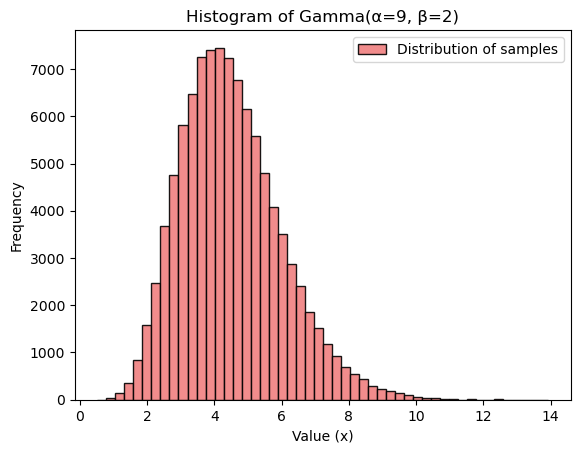

In [5]:
plt.hist(samples, bins=50, alpha=0.9, color="lightcoral", edgecolor="black", label="Distribution of samples")
plt.xlabel("Value (x)")
plt.ylabel("Frequency")
plt.title("Histogram of Gamma(α=9, β=2)")
plt.legend()
plt.show()

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

Your answers(s)

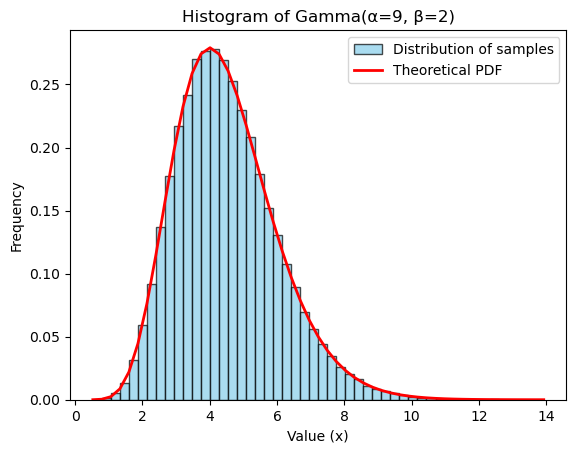

In [6]:
counts, bins, _ = plt.hist(samples, bins=50, density=True, alpha=0.7, color="skyblue", edgecolor="black", label="Distribution of samples")
pdf = gamma.pdf(bins, a=alpha, scale=scale)
plt.plot(bins, pdf, "r-", lw=2, label="Theoretical PDF")
plt.xlabel("Value (x)")
plt.ylabel("Frequency")
plt.title("Histogram of Gamma(α=9, β=2)")
plt.legend()

plt.savefig("img/gamma_histogram.png", dpi=150)
plt.show()

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a> [(&#8593;)](#content)

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

Your answers(s)

In [7]:
import pandas as pd
from IPython.display import display

In [8]:
df = pd.read_csv("data/data.csv")
df.sort_values(by="X", inplace=True, ignore_index=True)
display(df)

,X,Y
0,56,37
1,68,34
2,98,25
3,110,36
4,128,28
5,180,24
6,181,20
7,190,24
8,192,22
9,197,24


In [9]:
print("Median:")
df.median()

Median:


X    180.5
Y     24.0
dtype: float64

In [10]:
print("Mean:")
df.mean()

Mean:


X    153.750000
Y     25.916667
dtype: float64

In [11]:
print("Variance:")
df.var()

Variance:


X    3486.022727
Y      42.446970
dtype: float64

In [12]:
print("Standard deviation:")
df.std()

Standard deviation:


X    59.042550
Y     6.515134
dtype: float64

2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

Your answers(s)

In [13]:
# Define a rule depending on the degree of a polynomial
def define_rule(degree):
    """
    Defines a polynomial rule of a given degree based on data from a DataFrame.

    Parameters
    ----------
    degree : int
        The degree of the polynomial used to approximate the data.

    Returns
    -------
    numpy.poly1d
        A polynomial function (poly1d object) that can be used to compute values
        for new input data.

    Notes
    -----
    The function uses a global DataFrame `df` with two columns:
    - `df.X` : array/column of independent variable values
    - `df.Y` : array/column of dependent variable values
    """
    coeffs = np.polyfit(df.X, df.Y, degree)
    rule = np.poly1d(coeffs)
    return rule

3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

Your answers(s)

In [14]:
def draw_approximation(degree):
    """
    Plots a polynomial approximation of a given degree for a dataset and saves the figure.

    Parameters
    ----------
    degree : int
        The degree of the polynomial used to approximate the data.

    Returns
    -------
    None
        This function does not return any value. It generates a scatter plot of the
        dataset points, overlays the polynomial approximation curve, displays the plot,
        and saves it as a PNG image.

    Notes
    -----
    The function relies on a global DataFrame `df` with two columns:
    - `df.X` : array/column of independent variable values
    - `df.Y` : array/column of dependent variable values

    It internally uses the `define_rule` function to compute the polynomial.
    The plot is saved in the "img" folder with a filename reflecting the polynomial degree.
    """
    rule = define_rule(degree)
    plt.scatter(df.X, df.Y, color="skyblue", edgecolor="black", label="Dataset points")

    x_smooth = np.linspace(df.X.min(), df.X.max(), 200)
    y_smooth = [rule(x) for x in x_smooth]
    plt.plot(x_smooth, y_smooth, "r-", lw=2, label="Approximation line")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Polynomial approximation, degree = {degree}")
    plt.legend()
    
    plt.savefig(f"img/poly_approx_degree{degree}.png", dpi=150)
    plt.show()

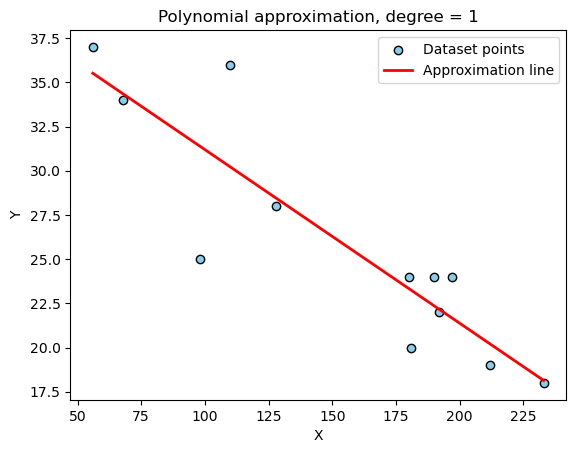

In [15]:
# Linear regression => degree = 1
draw_approximation(1)

Let's also have a look at degree = 3, 6, 9

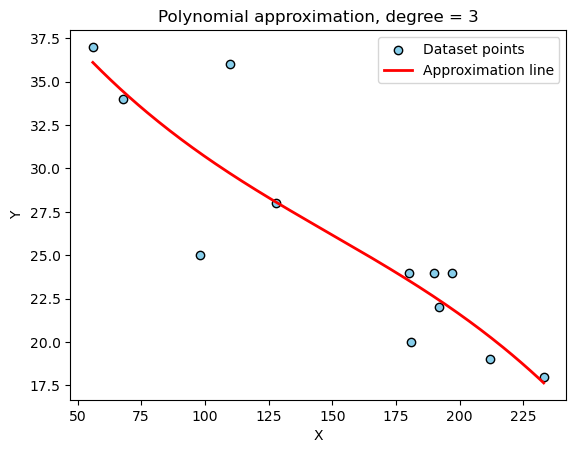

In [16]:
draw_approximation(3)

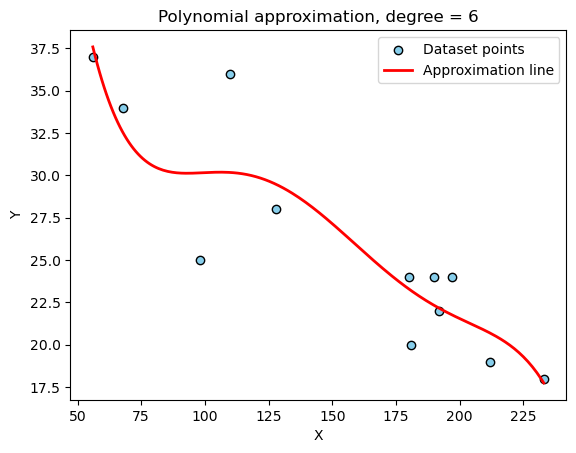

In [17]:
draw_approximation(6)

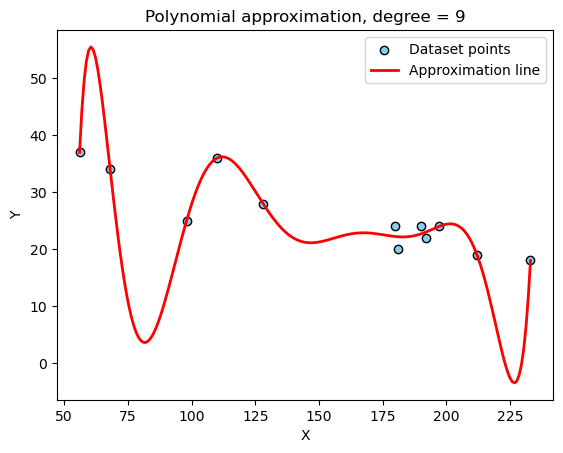

In [18]:
draw_approximation(9)

Here we can see a phenomenon called **overfitting** in machine learning, which occurs when the model memorizes the training data and loses its ability to generalize.

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a> [(&#8593;)](#content)

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{N}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times M}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

Your answers(s)

In [19]:
def gradient2D(X):
    """
    Compute the 2D discrete gradient operator D(X) = (DhX, DvX)
    for a given 2D matrix X from C^{M×N}.
    
    Parameters
    ----------
    X : np.ndarray
        Input 2D array of shape (M, N). Can be real or complex.
    
    Returns
    -------
    Dh : np.ndarray, shape (M, N)
        Horizontal differences. The last row is zero.
    
    Dv : np.ndarray, shape (M, N)
        Vertical differences. The last column is zero.
    
    Raises
    ------
    AssertionError
        If the input is not a 2D array.
    
    Examples
    --------
    >>> X = np.array([[1, 2, 4],
    ...               [3, 5, 7],
    ...               [1, 0, 2]], dtype=float)
    >>> Dh, Dv = gradient2D(X)
    >>> Dh
    array([[ 2.,  3.,  3.],
           [-2., -5., -5.],
           [ 0.,  0.,  0.]])
    >>> Dv
    array([[ 1.,  2.,  0.],
           [ 2.,  2.,  0.],
           [-1.,  2.,  0.]])
    """
    # Check that the input is a 2D array
    if X.ndim != 2:
        raise AssertionError("Input must be a 2D array (matrix).")
    
    M, N = X.shape

    # Horizontal differences with zero column appended
    Dh = np.concatenate([np.diff(X, axis=0), np.zeros((1, N), dtype=X.dtype)], axis=0)
    
    # Vertical differences with zero row appended
    Dv = np.concatenate([np.diff(X, axis=1), np.zeros((M, 1), dtype=X.dtype)], axis=1)

    return (Dh, Dv)

2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the functioni s evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

Your answers(s)

In [20]:
def test_gradient2D_output_shape():
    """Check that output has the correct shape and format."""
    X = np.random.randn(4, 6)
    Dh, Dv = gradient2D(X)
    
    assert isinstance(Dh, np.ndarray)
    assert isinstance(Dv, np.ndarray)
    assert Dh.shape == X.shape
    assert Dv.shape == X.shape

In [21]:
def test_gradient2D_constant_square_matrix():
    """For a constant square matrix, both Dh and Dv must be zero."""
    X = np.ones((3, 3))
    Dh, Dv = gradient2D(X)
    
    assert (Dh == 0).all()
    assert (Dv == 0).all()

In [22]:
def test_gradient2D_sample():
    """Check a simple case manually."""
    X = np.array([[1, 2, -5],
                  [3, 4, 0]], dtype=float)
    
    Dh, Dv = gradient2D(X)

    Dh_expected = np.array([[2, 2, 5],
                            [0, 0, 0]])
    Dv_expected = np.array([[1, -7, 0],
                            [1, -4, 0]])
     
    assert (Dh == Dh_expected).all()
    assert (Dv == Dv_expected).all()

In [23]:
def test_gradient2D_invalid_dim():
    """Check that the function raises an error for non-2D input."""
    X = np.random.randn(3, 3, 3)
    try:
        gradient2D(X)
        raise AssertionError("gradient2D did not raise an error for 3D input")
    except AssertionError:
        pass  # Correct behavior

In [24]:
test_gradient2D_output_shape()
test_gradient2D_constant_square_matrix()
test_gradient2D_sample()
test_gradient2D_invalid_dim()

3\. Document the function `gradient2D` with an appropriate docstring (see session 1).

Your answers(s)

**Done**, *see the answer for 1.*

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

Your answers(s)

In [25]:
def tv(X):
    """
    Compute the discrete isotropic total variation TV(X) of a 2D matrix X from C^{M×N}.
    
    The total variation is defined as:
        TV(X) = sum_{m,n} sqrt( |Dh[m,n]|^2 + |Dv[m,n]|^2 )
    where Dh and Dv are the horizontal and vertical finite differences.
    
    Parameters
    ----------
    X : np.ndarray
        Input 2D array of shape (M, N). Can be real or complex.
    
    Returns
    -------
    tv_value : float
        The total variation of the input matrix.
    
    Examples
    --------
    >>> X = np.array([[1, 2, 4],
    ...               [3, 5, 7],
    ...               [1, 0, 2]], dtype=float)
    >>> tv(X)
    25.055...
    """
    # Check that the input is a 2D array
    if X.ndim != 2:
        raise AssertionError("Input must be a 2D array (matrix).")
    
    Dh, Dv = gradient2D(X)
    return np.sum(np.sqrt(np.abs(Dh)**2 + np.abs(Dv)**2))

In [26]:
def test_tv_constant_matrix():
    """TV of a constant matrix must be zero."""
    X = np.ones((8, 5))
    assert (tv(X) == 0).all()

In [27]:
def test_tv_sample():
    """Check TV on a simple 5x4 example."""
    X = np.array([[1, 2, -3, 0],
                  [3, 4, 7, 7],
                  [-6, 6, 10, 2],
                  [4, 1, 8, 1],
                  [5, 5, 5, -3]], dtype=float)
    # Manual computation
    Dh, Dv = gradient2D(X)
    expected = np.sum(np.sqrt(Dh ** 2 + Dv ** 2))
    assert np.allclose(tv(X), expected)

In [28]:
def test_tv_invalid_dim():
    """Check that the function raises an error for non-2D input."""
    X = np.random.randn(3, 4, 5)
    try:
        tv(X)
        raise AssertionError("tv did not raise an error for 3D input")
    except AssertionError:
        pass  # Correct behavior

In [29]:
test_tv_constant_matrix()
test_tv_sample()
test_tv_invalid_dim()

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

Your answers(s)

In [30]:
def gradient2D_adjoint(Yh, Yv):
    """
    Compute the adjoint operator D*(Y) of the 2D discrete gradient operator.

    Parameters
    ----------
    Yh : np.ndarray, shape (M, N)
        Horizontal gradient component.
    Yv : np.ndarray, shape (M, N)
        Vertical gradient component.

    Returns
    -------
    adj : np.ndarray, shape (M, N)
        Result of applying D* to (Yh, Yv).
    """
    # Check that Yh and Yv have the same dimension
    if Yh.shape != Yv.shape:
        raise AssertionError("Yh and Yv must have the same dimension.")

    # Check that the input is a 2D array
    if Yh.ndim != 2:
        raise AssertionError("Input matrices must be 2D arrays.")
    
    M, N = Yh.shape

    # Special case: if M == 1 or N == 1, gradient degenerates to zero
    if M == 1 or N == 1:
        return np.zeros((M, N), dtype=Yh.dtype)

    # Horizontal adjoint (backward differences along axis=0)
    Xh = np.zeros((M, N), dtype=Yh.dtype)
    Xh[0, :] = -Yh[0, :]
    Xh[1:M-1, :] = -np.diff(Yh[:M-1, :], axis=0)
    Xh[-1, :] = Yh[-2, :]

    # Vertical adjoint (backward differences along axis=1)
    Xv = np.zeros((M, N), dtype=Yv.dtype)
    Xv[:, 0] = -Yv[:, 0]
    Xv[:, 1:N-1] = -np.diff(Yv[:, :N-1], axis=1)
    Xv[:, -1] = Yv[:, -2]
    
    return Xh + Xv

6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^H \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

Your answers(s)

In [31]:
def inner_product_matrix(A, B):
    """Count inner product ⟨A, B⟩"""
    return np.vdot(A, B)

def inner_product_pair(Uh, Uv, Vh, Vv):
    """Inner product on product space (Uh, Uv) ⋅ (Vh, Vv)."""
    return inner_product_matrix(Uh, Vh) + inner_product_matrix(Uv, Vv)

In [32]:
def test_gradient2D_adjoint_shapes():
    """
    Test that gradient2D_adjoint returns an array of the correct shape.
    We provide Yh and Yv with shape (M, N), and the result must also have (M, N).
    """
    M, N = 8, 5
    Yh = np.zeros((M, N))
    Yv = np.zeros((M, N))
    result = gradient2D_adjoint(Yh, Yv)
    assert result.shape == (M, N)

In [33]:
def test_gradient2D_adjoint_property_real():
    """
    Test the adjointness property for real matrices:
        ⟨D(X), Y⟩ = ⟨X, D*(Y)⟩
    where X from R^{M x N}, Y = (Yh, Yv).
    This is the key check to validate that gradient2D_adjoint is implemented correctly.
    """
    M, N = 9, 5
    X = np.random.randn(M, N)
    Yh = np.random.randn(M, N)
    Yv = np.random.randn(M, N)

    Dh, Dv = gradient2D(X)
    lhs = inner_product_pair(Dh, Dv, Yh, Yv)
    rhs = inner_product_matrix(X, gradient2D_adjoint(Yh, Yv))
    assert np.allclose(lhs, rhs, atol=1e-12)

In [34]:
def test_gradient2D_adjoint_property_complex():
    """
    Test the adjointness property for complex matrices:
        ⟨D(X), Y⟩ = ⟨X, D*(Y)⟩
    This ensures the implementation works in C^{MxN}, not only for real numbers.
    """
    M, N = 10, 7
    X = np.random.randn(M, N) + 1j * np.random.randn(M, N)
    Yh = np.random.randn(M, N) + 1j * np.random.randn(M, N)
    Yv = np.random.randn(M, N) + 1j * np.random.randn(M, N)

    Dh, Dv = gradient2D(X)
    lhs = inner_product_pair(Dh, Dv, Yh, Yv)
    rhs = inner_product_matrix(X, gradient2D_adjoint(Yh, Yv))
    assert np.allclose(lhs, rhs, atol=1e-12)

In [35]:
def test_gradient2D_adjoint_edge_case_M1_N1():
    """
    Edge case: a 1x1 input matrix.
    In this case, all forward differences are zero, and the adjoint must also
    preserve the property ⟨D(X), Y⟩ = ⟨X, D*(Y)⟩.
    This tests that boundary conditions are handled correctly.
    """
    X = np.random.randn(1, 1)
    Yh = np.random.randn(1, 1)
    Yv = np.random.randn(1, 1)

    Dh, Dv = gradient2D(X)
    lhs = inner_product_pair(Dh, Dv, Yh, Yv)
    rhs = inner_product_matrix(X, gradient2D_adjoint(Yh, Yv))
    assert np.allclose(lhs, rhs, atol=1e-12)

In [36]:
def test_gradient2D_adjoint_unequal_dimensions():
    """Check that the function raises an error when passing matrices of different dimensions."""
    X = np.random.randn(3, 4)
    Y = np.random.randn(4, 3)
    try:
        gradient2D_adjoint(X, Y)
        raise AssertionError("gradient2D_adjoint did not raise an error for matrices of different dimensions")
    except AssertionError:
        pass  # Correct behavior

In [37]:
def test_gradient2D_adjoint_invalid_dim():
    """Check that the function raises an error for non-2D input."""
    X = np.random.randn(3, 4, 5)
    try:
        gradient2D_adjoint(X, X)
        raise AssertionError("gradient2D_adjoint did not raise an error for 3D input")
    except AssertionError:
        pass  # Correct behavior

In [38]:
test_gradient2D_adjoint_shapes()
test_gradient2D_adjoint_property_real()
test_gradient2D_adjoint_property_complex()
test_gradient2D_adjoint_edge_case_M1_N1()
test_gradient2D_adjoint_unequal_dimensions()
test_gradient2D_adjoint_invalid_dim()

[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
> \begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

Your answers(s)

In [39]:
def gradientND(X):
    """
    Compute the discrete gradient operator D(X) along each dimension
    of an N-dimensional tensor.

    Parameters
    ----------
    X : np.ndarray
        Input array of shape (N1, N2, ..., Np).
        Can be real or complex.

    Returns
    -------
    grads : tuple of np.ndarray
        Tuple of arrays, one for each dimension. Each array has the
        same shape as X, with forward differences along the corresponding
        axis and zeros appended at the end along that axis.

    Raises
    ------
    AssertionError
        If the input is not an ndarray.

    Examples
    --------
    >>> X = np.array([[1, 2, 4],
    ...               [3, 5, 7],
    ...               [1, 0, 2]], dtype=float)
    >>> Gh, Gv = gradientND(X)
    >>> Gh.shape, Gv.shape
    ((3, 3), (3, 3))
    >>> Gh
    array([[ 2.,  3.,  3.],
           [-2., -5., -5.],
           [ 0.,  0.,  0.]])
    >>> Gv
    array([[ 1.,  2.,  0.],
           [ 2.,  2.,  0.],
           [-1.,  2.,  0.]])
    >>> # For 3D input youd get 3 outputs, one per axis.
    """
    if not isinstance(X, np.ndarray):
        raise AssertionError("Input must be a numpy ndarray.")

    grads = []
    for axis in range(X.ndim):
        shape = list(X.shape)
        shape[axis] = 1  # one extra slice for zeros
        pad = np.zeros(shape, dtype=X.dtype)
        diff = np.diff(X, axis=axis)
        grad_axis = np.concatenate([diff, pad], axis=axis)
        grads.append(grad_axis)

    return tuple(grads)

In [40]:
def test_gradientND_output_shape_2dim():
    """Check that output has the correct shape and format for the case dim=2."""
    X = np.random.randn(4, 6)
    Dh, Dv = gradientND(X)
    
    assert isinstance(Dh, np.ndarray)
    assert isinstance(Dv, np.ndarray)
    assert Dh.shape == X.shape
    assert Dv.shape == X.shape

In [41]:
def test_gradientND_compare_with_2D():
    """Check that output is the same as for gradient2D when ndim=2."""
    X = np.random.randn(9, 7)
    Dh, Dv = gradientND(X)
    Dh_correct, Dv_correct = gradient2D(X)
    
    assert np.allclose(Dh, Dh_correct, atol=1e-12)
    assert np.allclose(Dv, Dv_correct, atol=1e-12)

In [42]:
def test_gradientND_output_shape_5dim():
    """Check that output has the correct shape and format for the case dim=5."""
    X = np.random.randn(3, 17, 10, 5, 7)
    D = gradientND(X)

    for i in range(5):
        assert isinstance(D[i], np.ndarray)
        assert D[i].shape == X.shape

In [43]:
test_gradientND_output_shape_2dim()
test_gradientND_compare_with_2D()
test_gradientND_output_shape_5dim()

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
